In [135]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Section 1.1 Vectors and Matrices

In [64]:
# T1
np.pi
math.pi == np.pi  # True
2 ** 0.5 == np.sqrt(2)  # True
np.sqrt(2) ** 2 == 2  # False
1/3 + 1/3 + 1/3 == 1  # True
1.0 == 1  # True
np.e
np.log(np.e) == 1  # True

def calculate_e_taylor(n):
    e = 0
    for i in range(n):
        e += 1 / math.factorial(i)
    return e

def calculate_e_taylor_numpy(n):
    factorials = np.arange(1, n)  # Create an array with integers from 0 to n-1
    factorials = np.cumprod(factorials)  # Compute the factorial of each element in the array
    terms = 1 / factorials  # Calculate the terms of the Taylor series
    e = np.sum(terms)  # Sum the terms to approximate e
    return e

def calculate_e_limit(n):
    return (1 + 1/n) ** n

print(calculate_e_taylor(1000))
print(calculate_e_taylor_numpy(50))
print(calculate_e_limit(1000))

2.7182818284590455
1.7182818284590453
2.7169239322355936


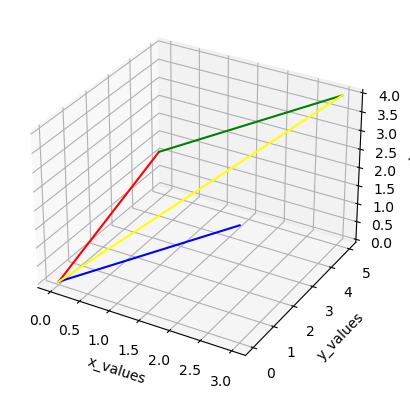

In [11]:
# 1.2 T2
# Define vectors
v1 = np.array([1, 2, 3])
v2 = np.array([2, 3, 1])
v_sum = v1 + v2

# Set up figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0, v1[0]], [0, v1[1]], [0, v1[2]], color='red')
ax.plot([0, v2[0]], [0, v2[1]], [0, v2[2]], color='blue')
ax.plot([v1[0], v_sum[0]], [v1[1], v_sum[1]], [v1[2], v_sum[2]], color='green')
ax.plot([0, v_sum[0]], [0, v_sum[1]], [0, v_sum[2]], color='yellow')

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.show()

In [72]:
# T4
v1 = np.array([7.1, -3])
v2 = np.array([np.sqrt(2), 6]) * (-5)
v3 = np.array([0, np.pi]) * 3
u = v1 + v2 + v3
np.set_printoptions(precision=5)
print(u)

[  0.02893 -23.57522]


In [85]:
u = np.array([1, 2])
v = np.array([3, 4])
# ||u+v||^2
a = np.linalg.norm(u + v) ** 2
# ||u-v||^2
b = np.linalg.norm(u - v) ** 2
print(a, b)
c = np.linalg.norm(u) ** 2
d = np.linalg.norm(v) ** 2
print(c, d)
np.allclose(a+b, 2*(c + d))  # True

51.99999999999999 8.000000000000002
5.000000000000001 25.0


True

## Section 1.2 Dot Product and Orthognoality

In [90]:
# T1
# exp1 ||V|| = sqrt(v1^2 + v2^2 + ... + vn^2)
v = np.array([1, 2, 3])
np.linalg.norm(v) == np.dot(v, v) ** 0.5  # True

# exp2 u = v / ||v||
u = v / np.linalg.norm(v)
print(u)

# exp4 (u-2v) dot (3u + 4v)
u = np.array([1, 2])
v = np.array([3, 4])
np.dot((u - 2*v), (3*u + 4*v)) == np.dot(u, 3*u + 4*v) - 2 * np.dot(v, 3*u + 4*v)  # True


[0.26726 0.53452 0.80178]


True

In [94]:
# T2
# a
v = np.arange(1, 11)
print(np.sum(np.power(v, 3)))

# b
v = np.arange(1, 21)
print(np.sum(np.power(v, 2) * np.cos(v*np.pi)))

3025
210.0


In [99]:
# T3
# a
u = np.array([1, -2, 4, 1])
v = np.array([7, 4, -3, 2])
cos = np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
sin = np.sqrt(1 - cos ** 2)
theta = np.arccos(cos)
print(cos, sin, theta)


-0.26554250227189713 0.9640991543856781 1.8395629093602084


In [106]:
# T4
diag = np.array([10, 15, 25])
v1, v2, v3 = np.diag(diag)
cos = np.dot(v1, diag) / (np.linalg.norm(v1) * np.linalg.norm(diag))
theta = np.arccos(cos)
print(cos, theta)

0.3244428422615251 1.2403736788834132


In [107]:
# T5
u = np.arange(1, 101)
v = 1 / (np.arange(1, 101) + 1)
print(np.sum(np.dot(u, v)))

95.80272149226137


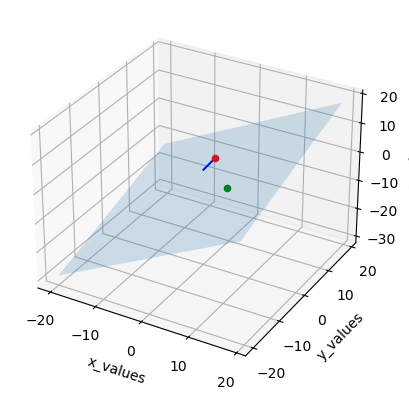

In [134]:
# 1-3. example3
# draw a plane in 3D. point-normal form

point = np.array([3, -1, 7])
normal = np.array([4, 2, -5])
d = point.dot(normal)
point2 = np.array([0, 0, 1])

# create x,y
xx, yy = np.meshgrid(range(-20, 20), range(-20, 20))
z = -(normal[0] * xx + normal[1] * yy + d) / normal[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.scatter(*normal, color='green')
ax.scatter(*point, color='red')

# draw line from point to point2
ax.plot([point[0], point2[0]], [point[1], point2[1]], [point[2], point2[2]], color='blue')


ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.show()

## Vector equations of Lines and Planes

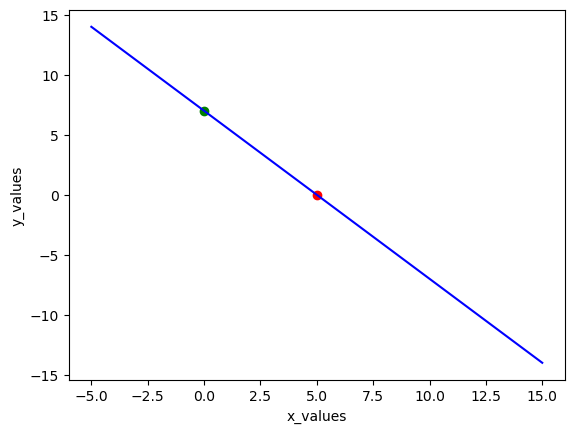

In [149]:
# T1
# x = 5 + 5t
# y = -7t
# 7x + 5y = 35
# Lets draw the line

t = np.linspace(-2, 2)
x = 5 + 5 * t
y = -7 * t
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color='blue')
ax.scatter(5, 0, color='red')
ax.scatter(0, 7, color='green')
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
plt.show()

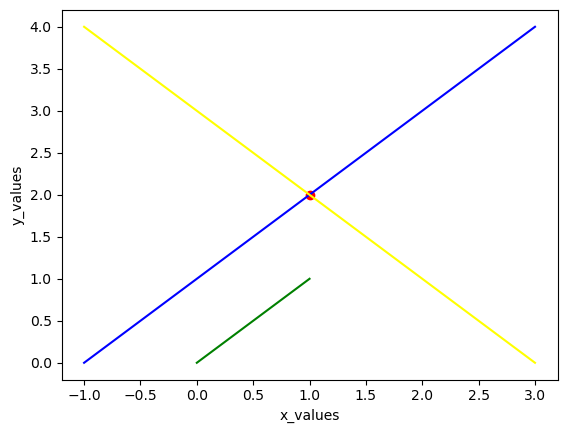

In [156]:
# T2
# P(1,2)
# v = (1, 1) parallel to p1 
p = np.array([1, 2])
v = np.array([1, 1])
# P1 = P + tV / parallel to V
t1 = np.linspace(-2, 2)
x1 = p[0] + t1 * v[0]
y1 = p[1] + t1 * v[1]
# P2 = P + tV / perpendicular to V
t2 = np.linspace(-2, 2)
x2 = p[0] + t2 * (-1 * v[1])
y2 = p[1] + t2 * v[0]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color='blue')
ax.plot(x2, y2, color='yellow')
ax.plot([0, 1], [0, 1], color='green')
ax.scatter(1, 2, color='red')
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
# ax.set_aspect('equal', adjustable='box')
plt.show()


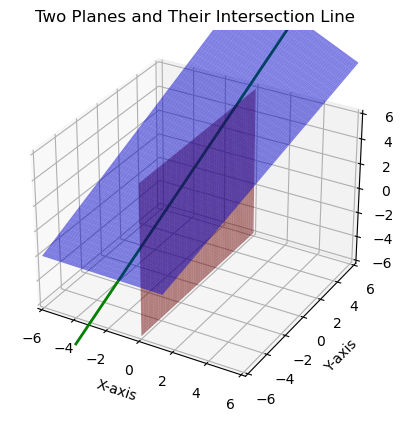

35.26438968275465

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the limits for the axes
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-6, 6)

# Plane 1: x = 0
y = np.linspace(-6, 6, 100)
z = np.linspace(-6, 6, 100)
Y, Z = np.meshgrid(y, z)
X = np.zeros_like(Y)

ax.plot_surface(X, Y, Z, alpha=0.5, color='r', label='Plane 1: x = 0')

# Plane 2: 2x - y + z - 4 = 0
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = 2*X - Y + 4

ax.plot_surface(X, Y, Z, alpha=0.5, color='b', label='Plane 2: 2x - y + z - 4 = 0')

# Intersection line
t = np.linspace(-6, 6, 100)
x = np.zeros_like(t)
y = 2 * t
z = t + 4

ax.plot(x, y, z, color='g', linewidth=2, label='Intersection Line')

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set the title and legend
ax.set_title('Two Planes and Their Intersection Line')

# Show the plot
plt.show()

# Calculate angle between normal vectors of two planes
n1 = np.array([1, 0, 0])
n2 = np.array([2, -1, 1])
cos = np.dot(n1, n2) / (np.linalg.norm(n1) * np.linalg.norm(n2))
theta = np.arccos(cos)
import math
math.degrees(theta)

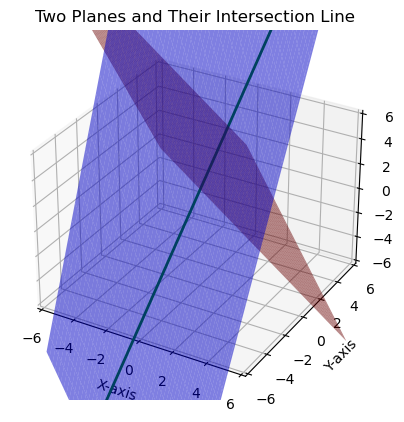

100.98057542761215


In [219]:
# T3 -2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the limits for the axes
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-6, 6)

# Plane 1: x + 2y - 2z - 5 = 0
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = -X - 2*Y + 5
ax.plot_surface(X, Y, Z, alpha=0.5, color='r', label='Plane 1: x + 2y - 2z - 5 = 0')

# Plane 2: 6x - 3y + 2z - 8 = 0
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = 6*X - 3*Y + 8
ax.plot_surface(X, Y, Z, alpha=0.5, color='b', label='Plane 2: 6x - 3y + 2z - 8 = 0')

# Intersection line
t = np.linspace(-6, 6, 100)
x = np.zeros_like(t)
y = 7*t + 13
z = (15*t + 31) / 2

ax.plot(x, y, z, color='g', linewidth=2, label='Intersection Line')

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set the title and legend
ax.set_title('Two Planes and Their Intersection Line')
plt.show()

# Calculate angle between normal vectors of two planes
n1 = np.array([1, 2, -2])
n2 = np.array([6, -3, 2])
cos = np.dot(n1, n2) / (np.linalg.norm(n1) * np.linalg.norm(n2))
theta = np.arccos(cos)
angle = math.degrees(theta)
print(angle)
